# Investment Analysis Assignment

## Checkpoint 1: Data Cleaning 1

In [1]:
# loading libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

read_csv takes an encoding option to deal with files in different formats. I mostly use read_csv('file', encoding = "ISO-8859-1"), or alternatively encoding = "utf-8" for reading, and generally utf-8 for to_csv.

In [690]:
# reading the data from the provided data
companies = pd.read_csv("data/companies.txt", sep="\t", encoding = "ISO-8859-1")
mapping_df = pd.read_csv('data/mapping.csv', encoding = "ISO-8859-1")
rounds2 = pd.read_csv('data/rounds2.csv', encoding = "ISO-8859-1")

##  Table 1.1
### How many unique companies are present in rounds2?
#### Below are the steps to get unique companies are present in rounds2

In [691]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [692]:
print(rounds2.shape)
rounds2.head()

(114949, 6)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### As, I can see company name is not available in the rounds2 table but can see the details of the company permalink , let's verify companies data.

### Companies Data

In [693]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [694]:
print(companies.shape)
companies.head()

(66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [695]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Blaze-2,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


The companies name present in the companies data. Where, I found "permalink" used in the both dataframe which we can considered as a key in the both dataframe to calculate companies name in the rounds2 dataframe. <br><br>
After looking into the both dataframe, It's seems "permalink" in companies and "company_permalink" in the rounds2 dataframe are not in the valid format.<br>
So, We have to change the data in the unique format.

In [696]:
# Convert permalink in the lower case 
companies['permalink']=companies['permalink'].str.lower()
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [697]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [698]:
rounds2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


Basic test of data that "company_permalink" from the rounds2 dataframe exist in the "permalink" of the companies dataframe.

In [699]:
rounds2['company_permalink'].isin(companies['permalink'])

0         True
1         True
2         True
3         True
4         True
          ... 
114944    True
114945    True
114946    True
114947    True
114948    True
Name: company_permalink, Length: 114949, dtype: bool

As per the above test we found that "company_permalink" from the rounds2 dataframe exist in the "permalink" of the companies dataframe but check wether it's applied for all the data. <br><br>
Below are the set operations to check differences.

In [700]:
set(companies['permalink']).symmetric_difference(rounds2['company_permalink'])

{'/organization/e-cã\x8abica',
 '/organization/e-cã\x9abica',
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f',
 '/organization/energystone-games-ç\x81µçÿ³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§\x9fè½¦',
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦',
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88\x9fä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x9a\x80'}

In [701]:
set(companies['permalink']).difference(rounds2['company_permalink'])

{'/organization/e-cã\x9abica',
 '/organization/energystone-games-ç\x81µçÿ³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§\x9fè½¦',
 '/organization/tipcat-interactive-æ²\x99è\x88\x9fä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x9a\x80'}

In [702]:
set(rounds2['company_permalink']).difference(companies['permalink'])

{'/organization/e-cã\x8abica',
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦',
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80'}

As per the above results, I found some data looks similar with other but required additional character decoding.
#### characters encoding and decoding

In [703]:
companies['permalink']=companies['permalink'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2['company_permalink']=rounds2['company_permalink'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

#### Verify the uncommon link in the two datasets.

In [704]:
set(companies['permalink']).symmetric_difference(rounds2['company_permalink'])

set()

Looks like "permalink" in companies and "company_permalink" in the rounds2 dataframe are in the unique format. So we are ready to merge two dataframes.<br><br>
To avoid duplicate entries of permalik we will rename either "permalink" to "company_permalink" in the companies datafrme or vice vera in the rounds2 dataframe.

In [705]:
rounds2.rename(columns={'company_permalink':'permalink'}, inplace=True)

In [706]:
rounds2.head(2)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


### Merge two dataframe rounds2 and companies

In [707]:
master_frame = pd.merge(rounds2, companies, on='permalink')

In [708]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


Replacing "NaN" value using 0 to maintain unique datatype accross the raised_amount_usd value.

In [709]:
# master_frame.raised_amount_usd = master_frame.raised_amount_usd.fillna(0)
# master_frame.head(5)

## 1. How many unique companies are present in rounds2?
Verify the details for the companies permalink and name columns

In [710]:
master_frame.loc[:, ['permalink', 'name']].describe()

,permalink,name
count,114949,114948
unique,66368,66102
top,/organization/solarflare,Solarflare Communications
freq,19,19


In [711]:
rounds2.loc[:, ['permalink']].describe()

,permalink
count,114949
unique,66368
top,/organization/solarflare
freq,19


As per the above two dataframe we found 66102 unique companies and 66368 unique permalink which whom companies name are missing

## 2. How many unique companies are present in companies?

In [712]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/organization/catchme,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


As per the above dataframe 66102 unique companies presents and 66368 unique permalink which might have missing companies name.

## 3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
- <b>permalink</b>

## 4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
- <b>No</b>, As per the below expression.


In [713]:
set(rounds2['permalink']).difference(companies['permalink'])

set()

## 5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?
- <b>114949</b>, As per the below info.

In [714]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [715]:
master_frame.count()

permalink                  114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
name                       114948
homepage_url               108815
category_list              111539
status                     114949
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94428
dtype: int64

In [716]:
master_frame.loc[:, ['permalink']].describe()

,permalink
count,114949
unique,66368
top,/organization/solarflare
freq,19


## Checkpoint 2: Funding Type Analysis

## Table-2.1
####  Average Values of Investments for Each of these Funding Types

#### Key points which we need to consider in the below operation
- Spark Funds wants to invest between 5 to 15 million USD per investment round.
- Spark Funds wants to choose one of these four investment types that is venture, angel, seed, and private equity.

#### Check the list of investment types in the master_frame and filter the dataframe based on the selected investment types.

In [717]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

#### Checking missing data in % for the selected investement type

In [718]:
round(100*(master_frame.loc[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])].isnull().sum()/len(master_frame.loc[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])].index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         67.03
funded_at                   0.00
raised_amount_usd          14.59
name                        0.00
homepage_url                4.39
category_list               2.65
status                      0.00
country_code                7.76
state_code                  9.83
region                      9.07
city                        9.06
founded_at                 17.71
dtype: float64

"funding_round_code" has <b>67%</b> of missing data which is not useful to get the accurate results so droping it.

In [719]:
master_frame = master_frame.drop('funding_round_code', axis=1)

#### I found below column also not useful to process the results for the given checkpoints.
- homepage_url
- status
- state_code - It can be useful if we need to get country based on the state name in case we have state wise data for the country
- region
- city
- founded_at

In [720]:
master_frame = master_frame.drop(['homepage_url', 'status', 'state_code', 'region', 'city', 'founded_at', 'funded_at'], axis=1)
master_frame.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA


## Handling missing data for the selected investment type

Checking missing data based on the investment type to get the accurate results.
#### - <b>Venture</b> Investment type

In [721]:
master_frame.loc[master_frame.funding_round_type == 'venture'].describe()

,raised_amount_usd
count,5.022800e+04
mean,1.174895e+07
std,8.635207e+07
min,0.000000e+00
25%,1.600902e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


### Detect outliers
#### Check the outliers in the venture type investment using boxplot

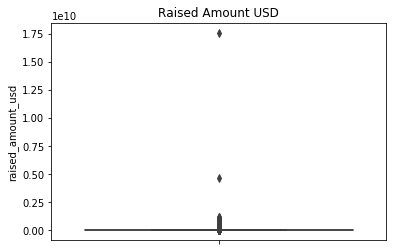

In [722]:
sns.boxplot(y=master_frame.loc[master_frame.funding_round_type == 'venture']['raised_amount_usd'])
plt.title('Raised Amount USD')
plt.show()

#### Outliers with Z-Scores
Calculate z-score using mean and median and after add the new column "raised_amount_usd_z_score"

In [723]:
z_venture = master_frame.loc[master_frame.funding_round_type == 'venture']
z_venture_mean = z_venture['raised_amount_usd'].mean()
z_venture_std = z_venture['raised_amount_usd'].std()
dem = z_venture['raised_amount_usd']-z_venture_mean

In [725]:

z_venture.loc[:,'raised_amount_usd_z_score'] = dem/z_venture_std
z_venture.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,raised_amount_usd_z_score
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,IND,-0.020254
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA,NaN


#### z-score value -3 and +3 can be consider to be an outlier.  Filter the dataframe based on the z-score value.

In [726]:
z_venture_z_score = z_venture[z_venture['raised_amount_usd_z_score'].between(-3, 3)==True]
z_venture_outliers = z_venture.loc[(z_venture['raised_amount_usd_z_score'] < -3) | (z_venture['raised_amount_usd_z_score'] > 3)]
print("z-score value between -3 and +3 is in % =",len(z_venture_z_score)/len(z_venture)*100)
print("outlier data in % =",100-len(z_venture_z_score)/len(z_venture)*100)

z-score value between -3 and +3 is in % = 90.34850614480845
outlier data in % = 9.651493855191546


To corss check outliers in the venture investment type after filter outliers

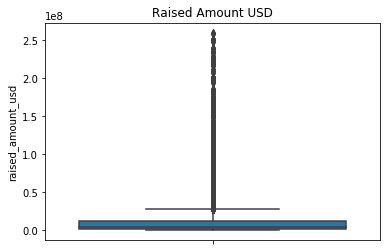

In [727]:
sns.boxplot(y=z_venture_z_score['raised_amount_usd'])
plt.title('Raised Amount USD')
plt.show()

Observation for the venture investment type

In [728]:
z_venture_z_score.describe()

,raised_amount_usd,raised_amount_usd_z_score
count,5.013800e+04,50138.000000
mean,1.042847e+07,-0.015292
std,1.788106e+07,0.207072
min,0.000000e+00,-0.136059
25%,1.600000e+06,-0.117530
50%,5.000000e+06,-0.078156
75%,1.200000e+07,0.002907
max,2.600000e+08,2.874871


In [729]:
z_venture_z_score.median()

raised_amount_usd            5.000000e+06
raised_amount_usd_z_score   -7.815620e-02
dtype: float64

#### I am planning to keep all the rows so updating outliers value with mean value in the dataframe.

In [730]:
master_frame.loc[(z_venture_outliers['raised_amount_usd'].min()<=master_frame['raised_amount_usd'])&(master_frame['raised_amount_usd']<=z_venture_outliers['raised_amount_usd'].max()) & (master_frame['funding_round_type'] == 'venture'), ['raised_amount_usd']] = z_venture_z_score['raised_amount_usd'].mean()

mean value looks closer to 75% data and it's less then max so updating missing value with mean for the "venture" investment type

In [731]:
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].fillna(z_venture_z_score['raised_amount_usd'].mean())
master_frame.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,1.000000e+07,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,1.042847e+07,:Qounter,Application Platforms|Real Time|Social Network...,USA


In [732]:
# master_frame.loc[(np.isnan(master_frame['raised_amount_usd'])) & (master_frame['funding_round_type'] == 'venture'), ['raised_amount_usd']] = master_frame.loc[master_frame.funding_round_type == 'venture']['raised_amount_usd'].mean()

observation for the category_list and country code

In [733]:
master_frame.loc[master_frame.funding_round_type == 'venture'].loc[:, ['category_list', 'country_code']].describe()

,category_list,country_code
count,54362,52619
unique,11634,103
top,Biotechnology,USA
freq,5673,38372


Updating the missing value for the category_list and country_code with the mod values

In [734]:
master_frame.loc[(master_frame['category_list'].isnull()) & (master_frame['funding_round_type'] == 'venture'), ['category_list']]='Biotechnology'
master_frame.loc[(master_frame['country_code'].isnull()) & (master_frame['funding_round_type'] == 'venture'), ['country_code']]='USA'
# To cross verification for the "venture" investment type
round(100*(master_frame.loc[master_frame.funding_round_type=='venture'].isnull().sum()/len(master_frame.loc[master_frame.funding_round_type=='venture'].index)), 2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
country_code               0.0
dtype: float64

#### mean value for the venture type investment

In [735]:
# master_frame.loc[master_frame.funding_round_type == 'venture'].describe()
master_frame.loc[master_frame.funding_round_type == 'venture']['raised_amount_usd'].mean()

10428473.086919593

#### - <b>Angel</b> investment type

In [736]:
master_frame.loc[master_frame.funding_round_type == 'angel'].describe()

,raised_amount_usd
count,6.094000e+03
mean,2.876270e+06
std,7.629273e+06
min,0.000000e+00
25%,2.000000e+05
50%,6.000000e+05
75%,2.500000e+06
max,4.945120e+08


### Detect outliers
#### Check the outliers in the angel type investment using boxplot

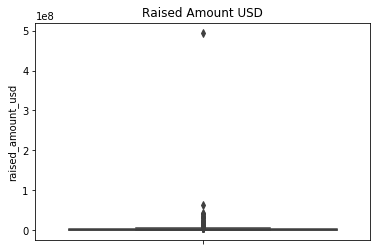

In [737]:
sns.boxplot(y=master_frame.loc[master_frame.funding_round_type == 'angel']['raised_amount_usd'])
plt.title('Raised Amount USD')
plt.show()

#### Outliers with Z-Scores
Calculate z-score using mean and median and after add the new column "raised_amount_usd_z_score"

In [739]:
z_angel = master_frame.loc[master_frame.funding_round_type == 'angel']
z_angel_mean = z_angel['raised_amount_usd'].mean()
z_angel_std = z_angel['raised_amount_usd'].std()
dem = z_angel['raised_amount_usd']-z_angel_mean
z_angel.loc[:,'raised_amount_usd_z_score'] = dem/z_angel_std
z_angel.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,raised_amount_usd_z_score
32,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,4.392386e+07,Beijing 1000CHI Software Technology,Mobile,NaN,5.380276
51,/organization/1006-tv,/funding-round/a3631227d5232aa8c2303f252c4f1f87,angel,1.042847e+07,1006.tv,Games|Media,CHN,0.989898


#### z-score value -3 and +3 can be consider to be an outlier. Filter the dataframe based on the z-score value.

In [740]:
z_angel_z_score = z_angel[z_angel['raised_amount_usd_z_score'].between(-3, 3)==True]
z_angel_outliers = z_angel.loc[(z_angel['raised_amount_usd_z_score'] < -3) | (z_angel['raised_amount_usd_z_score'] > 3)]
print("z-score value between -3 and +3 is in % =",len(z_angel_z_score)/len(z_angel)*100)
print("outlier data in % =",100-len(z_angel_z_score)/len(z_angel)*100)

z-score value between -3 and +3 is in % = 99.83590416803413
outlier data in % = 0.16409583196586652


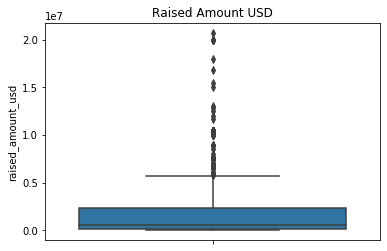

In [741]:
sns.boxplot(y=z_angel_z_score['raised_amount_usd'])
plt.title('Raised Amount USD')
plt.show()

In [742]:
z_angel_z_score.describe()

,raised_amount_usd,raised_amount_usd_z_score
count,6.084000e+03,6084.000000
mean,2.743255e+06,-0.017435
std,4.067757e+06,0.533178
min,0.000000e+00,-0.377005
25%,2.000000e+05,-0.350790
50%,6.000000e+05,-0.298360
75%,2.400000e+06,-0.062427
max,2.070832e+07,2.337319


#### Planning to keep all the rows so updating outliers value with mean value in the dataframe.

In [743]:
master_frame.loc[(z_angel_outliers['raised_amount_usd'].min()<=master_frame['raised_amount_usd'])&(master_frame['raised_amount_usd']<=z_angel_outliers['raised_amount_usd'].max()) & (master_frame['funding_round_type'] == 'angel'), ['raised_amount_usd']] = z_angel_z_score['raised_amount_usd'].mean()

In [744]:
master_frame.shape

(114949, 7)

mean value looks closer to 75% data and it's less then max so updating missing value with mean for the "angel" investment type

In [745]:
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].fillna(z_angel_z_score['raised_amount_usd'].mean())
master_frame.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,1.000000e+07,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,1.042847e+07,:Qounter,Application Platforms|Real Time|Social Network...,USA


#### Verify the mod value for the category_list and country code and update the missing values

In [746]:
# master_frame.loc[(np.isnan(master_frame['raised_amount_usd'])) & (master_frame['funding_round_type'] == 'angel'), ['raised_amount_usd']] = master_frame.loc[master_frame.funding_round_type == 'angel']['raised_amount_usd'].median()
master_frame.loc[master_frame.funding_round_type == 'angel'].loc[:, ['category_list', 'country_code']].describe()

,category_list,country_code
count,5954,5479
unique,3825,88
top,Software,USA
freq,157,2756


In [747]:
master_frame.loc[(master_frame['category_list'].isnull()) & (master_frame['funding_round_type'] == 'angel'), ['category_list']]='Software'
master_frame.loc[(master_frame['country_code'].isnull()) & (master_frame['funding_round_type'] == 'angel'), ['country_code']]='USA'
round(100*(master_frame.loc[master_frame.funding_round_type=='angel'].isnull().sum()/len(master_frame.loc[master_frame.funding_round_type=='angel'].index)), 2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
country_code               0.0
dtype: float64

#### Mean value for the angel type investment

In [748]:
# master_frame.loc[master_frame.funding_round_type == 'angel'].describe()
master_frame.loc[master_frame.funding_round_type == 'angel']['raised_amount_usd'].mean()

2743255.225552126

### - <b>Seed</b> Investment type

In [749]:
master_frame.loc[master_frame.funding_round_type == 'seed'].describe()

,raised_amount_usd
count,3.052400e+04
mean,2.921155e+06
std,4.510380e+06
min,0.000000e+00
25%,1.000000e+05
50%,5.750000e+05
75%,3.000000e+06
max,2.000000e+08


### Detect outliers
#### Detect outliers using boxplot for the seed type investment

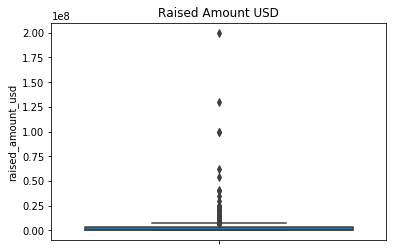

In [750]:
sns.boxplot(y=master_frame.loc[master_frame.funding_round_type == 'seed']['raised_amount_usd'])
plt.title('Raised Amount USD')
plt.show()

#### Outliers with Z-Scores
Calculate z-score using mean and median and after add the new column "raised_amount_usd_z_score"

In [753]:
z_seed = master_frame.loc[master_frame.funding_round_type == 'seed']
z_seed_mean = z_seed['raised_amount_usd'].mean()
z_seed_std = z_seed['raised_amount_usd'].std()
dem = z_seed['raised_amount_usd']-z_seed_mean
z_seed.loc[:,'raised_amount_usd_z_score'] = dem/z_seed_std
z_seed.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,raised_amount_usd_z_score
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA,-0.492454
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN,-0.638038


#### z-score value -3 and +3 can be consider to be an outlier. Filter the dataframe based on the z-score value.

In [754]:
z_seed_z_score = z_seed[z_seed['raised_amount_usd_z_score'].between(-3, 3)==True]
z_seed_outliers = z_seed.loc[(z_seed['raised_amount_usd_z_score'] < -3) | (z_seed['raised_amount_usd_z_score'] > 3)]
print("z-score value between -3 and +3 is in % =",len(z_seed_z_score)/len(z_seed)*100)
print("outlier data in % =",100-len(z_seed_z_score)/len(z_seed)*100)

z-score value between -3 and +3 is in % = 99.93120167736863
outlier data in % = 0.0687983226313662


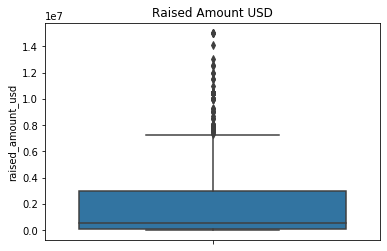

In [755]:
sns.boxplot(y=z_seed_z_score['raised_amount_usd'])
plt.title('Raised Amount USD')
plt.show()

In [756]:
z_seed_z_score.describe()

,raised_amount_usd,raised_amount_usd_z_score
count,3.050300e+04,30503.000000
mean,2.889311e+06,-0.007060
std,4.177674e+06,0.926235
min,0.000000e+00,-0.647652
25%,1.000000e+05,-0.625480
50%,5.709660e+05,-0.521062
75%,3.000000e+06,0.017481
max,1.502782e+07,2.684178


#### Planning to keep all the rows so updating outliers value with mean value in the dataframe.

In [757]:
master_frame.loc[(z_seed_outliers['raised_amount_usd'].min()<=master_frame['raised_amount_usd'])&(master_frame['raised_amount_usd']<=z_seed_outliers['raised_amount_usd'].max()) & (master_frame['funding_round_type'] == 'seed'), ['raised_amount_usd']] = z_seed_z_score['raised_amount_usd'].mean()

mean value looks closer to 75% data and it's less then max so updating missing value with mean for the "seed" investment type

In [758]:
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].fillna(z_seed_z_score['raised_amount_usd'].mean())
master_frame.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,1.000000e+07,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,1.042847e+07,:Qounter,Application Platforms|Real Time|Social Network...,USA


In [759]:
#### Check the mod value for the category_list and country code to udpate the missing value for the same

In [760]:
# master_frame.loc[(np.isnan(master_frame['raised_amount_usd'])) & (master_frame['funding_round_type'] == 'seed'), ['raised_amount_usd']] = master_frame.loc[master_frame.funding_round_type == 'seed']['raised_amount_usd'].median()
master_frame.loc[master_frame.funding_round_type == 'seed'].loc[:, ['category_list', 'country_code']].describe()

,category_list,country_code
count,29416,26867
unique,15264,118
top,Software,USA
freq,995,15612


In [761]:
master_frame.loc[(master_frame['category_list'].isnull()) & (master_frame['funding_round_type'] == 'seed'), ['category_list']]='Software'
master_frame.loc[(master_frame['country_code'].isnull()) & (master_frame['funding_round_type'] == 'seed'), ['country_code']]='USA'
round(100*(master_frame.loc[master_frame.funding_round_type=='seed'].isnull().sum()/len(master_frame.loc[master_frame.funding_round_type=='seed'].index)), 2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
country_code               0.0
dtype: float64

#### Mean value for the seed type investment

In [762]:
# master_frame.loc[master_frame.funding_round_type == 'seed'].describe()
master_frame.loc[master_frame.funding_round_type == 'seed']['raised_amount_usd'].mean()

2889311.14764354

### - <b>private equity</b> Investment type

In [763]:
master_frame.loc[master_frame.funding_round_type == 'private_equity'].describe()

,raised_amount_usd
count,2.285000e+03
mean,6.370458e+07
std,1.837485e+08
min,0.000000e+00
25%,6.500000e+06
50%,1.212201e+07
75%,6.240000e+07
max,4.745460e+09


### Detect outliers
#### Detect outliers using boxplot for the private equity type investment.

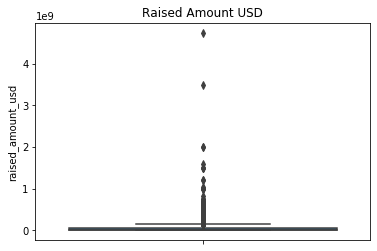

In [764]:
sns.boxplot(y=master_frame.loc[master_frame.funding_round_type == 'private_equity']['raised_amount_usd'])
plt.title('Raised Amount USD')
plt.show()

#### Outliers with Z-Scores
Calculate z-score using mean and median and after add the new column "raised_amount_usd_z_score"

In [766]:
z_private_equity = master_frame.loc[master_frame.funding_round_type == 'private_equity']
z_private_equity_mean = z_private_equity['raised_amount_usd'].mean()
z_private_equity_std = z_private_equity['raised_amount_usd'].std()
dem = z_private_equity['raised_amount_usd']-z_private_equity_mean
z_private_equity.loc[:,'raised_amount_usd_z_score'] = dem/z_private_equity_std
z_private_equity.head(2)


,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,raised_amount_usd_z_score
21,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,6000000.0,"1-800-PublicRelations, Inc.",Internet Marketing|Media|Public Relations,USA,-0.314041
153,/organization/1c-company,/funding-round/679ae989d9dd8195e989dda21eff44b7,private_equity,200000000.0,1C Company,Games|Software|Video Games,RUS,0.741750


In [767]:
z_private_equity_z_score = z_private_equity[z_private_equity['raised_amount_usd_z_score'].between(-3, 3)==True]
z_private_equity_outliers = z_private_equity.loc[(z_private_equity['raised_amount_usd_z_score'] < -3) | (z_private_equity['raised_amount_usd_z_score'] > 3)]
print("z-score value between -3 and +3 is in % =",len(z_private_equity_z_score)/len(z_private_equity)*100)
print("outlier data in % =",100-len(z_private_equity_z_score)/len(z_private_equity)*100)

z-score value between -3 and +3 is in % = 98.90590809628009
outlier data in % = 1.0940919037199137


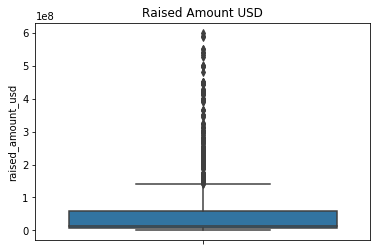

In [768]:
sns.boxplot(y=z_private_equity_z_score['raised_amount_usd'])
plt.title('Raised Amount USD')
plt.show()

In [769]:
z_private_equity_z_score.describe()

,raised_amount_usd,raised_amount_usd_z_score
count,2.260000e+03,2260.000000
mean,5.004763e+07,-0.074324
std,8.492508e+07,0.462181
min,0.000000e+00,-0.346694
25%,6.427006e+06,-0.311717
50%,1.200000e+07,-0.281388
75%,6.000000e+07,-0.020161
max,6.000000e+08,2.918638


#### Planning to keep all the rows so updating outliers value with mean value in the dataframe.

In [770]:
master_frame.loc[(z_private_equity_outliers['raised_amount_usd'].min()<=master_frame['raised_amount_usd'])&(master_frame['raised_amount_usd']<=z_private_equity_outliers['raised_amount_usd'].max()) & (master_frame['funding_round_type'] == 'private_equity'), ['raised_amount_usd']] = z_private_equity_z_score['raised_amount_usd'].mean()

mean value looks in the range to the max and 75% data so updating missing value with mean for the "private_equity"

In [771]:
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].fillna(z_private_equity_z_score['raised_amount_usd'].mean())
master_frame.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,1.000000e+07,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,1.042847e+07,:Qounter,Application Platforms|Real Time|Social Network...,USA


In [772]:
# master_frame.loc[(np.isnan(master_frame['raised_amount_usd'])) & (master_frame['funding_round_type'] == 'private_equity'), ['raised_amount_usd']] = master_frame.loc[master_frame.funding_round_type == 'private_equity']['raised_amount_usd'].mean()
master_frame.loc[master_frame.funding_round_type == 'private_equity'].loc[:, ['category_list', 'country_code']].describe()

,category_list,country_code
count,2168,2111
unique,865,58
top,Biotechnology,USA
freq,229,1397


In [773]:
master_frame.loc[(master_frame['category_list'].isnull()) & (master_frame['funding_round_type'] == 'private_equity'), ['category_list']]='Biotechnology'
master_frame.loc[(master_frame['country_code'].isnull()) & (master_frame['funding_round_type'] == 'private_equity'), ['country_code']]='USA'
round(100*(master_frame.loc[master_frame.funding_round_type=='private_equity'].isnull().sum()/len(master_frame.loc[master_frame.funding_round_type=='private_equity'].index)), 2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
country_code               0.0
dtype: float64

#### Mean vlaue for the Private Equity investment type

In [774]:
master_frame.loc[master_frame.funding_round_type == 'private_equity'].describe()
master_frame.loc[master_frame.funding_round_type == 'private_equity']['raised_amount_usd'].mean()

50047628.24749319

### To verify check the missing value % for all ('venture', 'angel', 'seed', 'private_equity') the selected invtestment type

In [775]:
round(100*(master_frame.loc[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])].isnull().sum()/len(master_frame.loc[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])].index)), 2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
country_code               0.0
dtype: float64

### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
#### Answer:- As per the below info "Venture" type investment is good 

In [776]:
df_by_funding = master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :].groupby('funding_round_type')
df_by_funding.raised_amount_usd.sum().sort_values(ascending = False)

funding_round_type
venture                  2.033871e+11
seed                     7.351738e+10
undisclosed              3.649126e+10
equity_crowdfunding      2.130990e+10
angel                    1.338803e+10
debt_financing           9.427973e+09
private_equity           7.622157e+09
convertible_note         4.245978e+09
grant                    2.271040e+09
post_ipo_equity          1.521676e+09
non_equity_assistance    1.245560e+09
secondary_market         7.102620e+08
product_crowdfunding     3.876640e+08
post_ipo_debt            2.989750e+08
Name: raised_amount_usd, dtype: float64

## Checkpoints - Part 2
## Checkpoint 3: Country Analysis

- Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

- For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [777]:
master_frame.loc[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])].groupby('country_code')["raised_amount_usd"].sum().sort_values(ascending = False).reset_index(name ='total_amount').head()

,country_code,total_amount
0,USA,5.699049e+11
1,CHN,4.621104e+10
2,GBR,3.186648e+10
3,IND,2.264595e+10
4,CAN,1.592269e+10


## Extract English-speaking countries from the wiki link

In [778]:
import requests
from bs4 import BeautifulSoup

In [779]:
wiki_url = requests.get('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language').text
soup = BeautifulSoup(wiki_url,'lxml')
tables = soup.find_all('table',{'class':'wikitable sortable'})
country_list = list()
for table in tables:
    for tr in table.find_all('tr')[1:]:
        tds = tr.find_all('td')[2].get_text().strip()
        if tds.isalpha() and len(tds) == 3:
            country_list.append(tds)
print(country_list)

['AUS', 'NZL', 'GBR', 'USA', 'ATG', 'BHS', 'BRB', 'BLZ', 'BWA', 'BDI', 'CMR', 'CAN', 'COK', 'DMA', 'SWZ', 'FJI', 'GMB', 'GHA', 'GRD', 'GUY', 'IND', 'IRL', 'JAM', 'KEN', 'KIR', 'LSO', 'LBR', 'MWI', 'MLT', 'MHL', 'MUS', 'FSM', 'NAM', 'NRU', 'NGA', 'NIU', 'PAK', 'PLW', 'PNG', 'PHL', 'RWA', 'KNA', 'LCA', 'VCT', 'WSM', 'SYC', 'SLE', 'SGP', 'SLB', 'ZAF', 'SSD', 'SDN', 'TZA', 'TON', 'TTO', 'TUV', 'UGA', 'VUT', 'ZMB', 'ZWE']


### For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [780]:
top9 = master_frame.loc[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity']) & master_frame.country_code.isin(country_list)].groupby('country_code')["raised_amount_usd"].sum().sort_values(ascending = False).reset_index(name ='total_amount').head(9)
top9.head(9)

,country_code,total_amount
0,USA,5.699049e+11
1,GBR,3.186648e+10
2,IND,2.264595e+10
3,CAN,1.592269e+10
4,SGP,5.206670e+09
5,IRL,3.811705e+09
6,AUS,2.837825e+09
7,ZAF,1.005459e+09
8,NZL,8.937701e+08


#### Analysing the Top 3 English-Speaking Countries

In [781]:
top9.head(3)
# top9 = master_frame.loc[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])].groupby('country_code')["raised_amount_usd"].sum().sort_values(ascending = False).reset_index(name ='total_amount')
# top9 = master_frame.loc[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])].groupby('country_code').raised_amount_usd.sum().sort_values(ascending = False)

,country_code,total_amount
0,USA,5.699049e+11
1,GBR,3.186648e+10
2,IND,2.264595e+10


### As per the wiki link USA, GBR & IND are the Top 3 English-Speaking Countries

## Checkpoint 4: Sector Analysis 1
### sector analysis

In [782]:
# mapping data load in the top so directly used mapping_df data frame
# mapping_df['category_list'].astype('category')
mapping_df.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


### 1. Extract the primary sector of each category list from the "category_list" column

In [783]:
mapping_df['primary_sector'] = mapping_df['category_list'].apply(lambda x: str(x).split('|')[0])
mapping_df['primary_sector'].head()

0              nan
1               3D
2      3D Printing
3    3D Technology
4       Accounting
Name: primary_sector, dtype: object

### 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

### Fetching main secotor based on the primary sector

In [784]:
# method to extract main sectors from the mapping file based on the primary sector.
def get_main_sector(row):
    for sector in mapping_df.columns:
        if row[sector]==1:
            return sector
        
mapping_df["main_sector"]=mapping_df.apply(get_main_sector, axis=1)
mapping_df[["primary_sector", "main_sector"]].head()

,primary_sector,main_sector
0,nan,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


### Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

In [785]:
master_frame = pd.merge(master_frame, mapping_df.loc[:, ['category_list', 'primary_sector', 'main_sector']], on='category_list')
# mapping_df.loc[:, ['category_list', 'primary_sector', 'main_sector']]
master_frame.tail()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
52288,/organization/wyzerr,/funding-round/2032acedd422ae79cf19c6b6eb454748,seed,25000.0,Wyzerr,User Experience Design,USA,User Experience Design,Others
52289,/organization/wyzerr,/funding-round/853467eb5297371c17b01b7b9de4bfe0,seed,50000.0,Wyzerr,User Experience Design,USA,User Experience Design,Others
52290,/organization/yaga-inc,/funding-round/03e919282840e8f7f1d02aab70348774,venture,15200000.0,"Yaga, Inc.",Emerging Markets,USA,Emerging Markets,Others
52291,/organization/yeswead,/funding-round/a279d39802cf188b2ae61ceea3866090,seed,700000.0,YesWeAd,Advertising Networks,ARG,Advertising Networks,"Social, Finance, Analytics, Advertising"
52292,/organization/zimp-recompensas,/funding-round/2c9bd2e21bcb66ca24fdc06719b746b1,seed,21930.0,Zimp Recompensas,Loyalty Programs,BRA,Loyalty Programs,Others


## Checkpoint 5: Sector Analysis 2

### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

    - All the columns of the master_frame along with the primary sector and the main sector

    - The total number (or count) of investments for each main sector in a separate column

    - The total amount invested in each main sector in a separate column

#### All the columns of the master_frame along with the primary sector and the main sector

In [786]:
master_frame.head(3)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,IND,Media,Entertainment
1,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,All Def Digital,Media,USA,Media,Entertainment
2,/organization/anthill-magazine,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,600000.0,Anthill Magazine,Media,AUS,Media,Entertainment


#### observations of funding type FT falling within the 5-15 million USD range.

In [787]:
master_frame_with_sector = master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :]
master_frame_with_sector.tail(3)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
52283,/organization/wing-ma-am,/funding-round/017fef93620f71e5b884435972b440e8,seed,1.042847e+07,Wing Ma'am,Gay & Lesbian,USA,Gay & Lesbian,Others
52286,/organization/womensforum-com,/funding-round/abcd58cc071342961f8cdd8f8d2d3ab9,undisclosed,7.000000e+06,Womensforum,Forums,USA,Forums,"News, Search and Messaging"
52287,/organization/wondermall,/funding-round/6a6c7f71edf62b79b467c60d2916cd1f,venture,1.042847e+07,Wondermall,Mobile Shopping,USA,Mobile Shopping,"Social, Finance, Analytics, Advertising"


#### The total number (or count) of investments for each main sector in a separate column

In [789]:
master_frame_with_sector.loc[:,'investment_count']=master_frame_with_sector.groupby('main_sector')['primary_sector'].transform('size')
master_frame_with_sector.tail(5)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,investment_count
52278,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,8.250000e+06,User Interface,User Interface,USA,User Interface,Others,6548
52281,/organization/victoria-plumb,/funding-round/4fb34112d2ef0dbaceb09b8d9d9afee0,undisclosed,1.042847e+07,VictoriaPlum.com,Home & Garden,NaN,Home & Garden,Cleantech / Semiconductors,4596
52283,/organization/wing-ma-am,/funding-round/017fef93620f71e5b884435972b440e8,seed,1.042847e+07,Wing Ma'am,Gay & Lesbian,USA,Gay & Lesbian,Others,6548
52286,/organization/womensforum-com,/funding-round/abcd58cc071342961f8cdd8f8d2d3ab9,undisclosed,7.000000e+06,Womensforum,Forums,USA,Forums,"News, Search and Messaging",1869
52287,/organization/wondermall,/funding-round/6a6c7f71edf62b79b467c60d2916cd1f,venture,1.042847e+07,Wondermall,Mobile Shopping,USA,Mobile Shopping,"Social, Finance, Analytics, Advertising",1369


#### Total amount invested in each main sector in a separate column

In [790]:
master_frame_with_sector.loc[:,'total_amount_invested']=master_frame_with_sector.groupby('main_sector')['raised_amount_usd'].transform('sum')
master_frame_with_sector.head(3)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,investment_count,total_amount_invested
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,1.000000e+07,#fame,Media,IND,Media,Entertainment,1233,1.208825e+10
1,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5.000000e+06,All Def Digital,Media,USA,Media,Entertainment,1233,1.208825e+10
3,/organization/attractive-black-singles-llc,/funding-round/231691541eddf75cf54d13a88370dd59,equity_crowdfunding,1.042847e+07,Attractive Black Singles LLC,Media,USA,Media,Entertainment,1233,1.208825e+10


## Three data frames D1, D2 and D3 

### For Country 1 USA

In [813]:
D1 = master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000) & (master_frame.country_code=='USA'), :]
D1.loc[:,'investment_count'] = D1.groupby('main_sector')['primary_sector'].transform('size')
D1.loc[:,'total_amount_invested'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')
D1.shape

(13468, 11)

### 1. Total number of investments (count)

In [814]:
total_number_of_investment_d1 = D1.groupby('main_sector')['primary_sector'].transform('size').unique()
total_number_of_investment_d1 = np.sort(total_number_of_investment_d1)
print(total_number_of_investment_d1)
total_number_of_investment_d1.sum()

[ 244  329  671  870  891 1182 1201 3373 4707]


13468

### 2. Total amount of investment (USD)

In [815]:
total_amount_invested_d1=D1.groupby('main_sector')['raised_amount_usd'].transform('sum').unique()
print(total_amount_invested_d1)
total_amount_invested_d1.sum()

[6.52484486e+09 1.13693283e+10 4.52740166e+10 3.19380903e+10
 1.11402257e+10 2.41760106e+09 8.41700889e+09 8.49284545e+09
 3.40407218e+09]


128978033392.99707

 ### 3. Top sector (based on count of investments)

In [816]:
# D1[['main_sector','investment_count']].sort_values(by='investment_count', ascending = False).head()
D1[['main_sector', 'investment_count', 'total_amount_invested']].drop_duplicates().sort_values(by='investment_count', ascending=False).head()

,main_sector,investment_count,total_amount_invested
1653,Others,4707,4.527402e+10
10869,Cleantech / Semiconductors,3373,3.193809e+10
54,"News, Search and Messaging",1201,1.136933e+10
24606,Health,1182,1.114023e+10
32457,"Social, Finance, Analytics, Advertising",891,8.492845e+09


In [817]:
# D1.loc[D1['investment_count']==D1['investment_count'].max(), ['main_sector']]
# D1.iloc[D1['investment_count'].idxmax(axis=1)]
# D1.loc[D1['investment_count'].idxmax()]['main_sector']
D1.loc[D1['investment_count']==total_number_of_investment_d1[-1]]['main_sector'].unique()[0]

'Others'

### 4. Second-best sector (based on count of investments)

In [818]:
D1.loc[D1['investment_count']==total_number_of_investment_d1[-2]]['main_sector'].unique()[0]

'Cleantech / Semiconductors'

 ### 5. Third-best sector (based on count of investments)

In [819]:
D1.loc[D1['investment_count']==total_number_of_investment_d1[-3]]['main_sector'].unique()[0]

'News, Search and Messaging'

 ### 6. Number of investments in the top sector (refer to point 3)

In [820]:
total_number_of_investment_d1[-1]

4707

### 7. Number of investments in the second-best sector (refer to point 4)

In [821]:
total_number_of_investment_d1[-2]

3373

 ### 8. Number of investments in the third-best sector (refer to point 5)

In [822]:
total_number_of_investment_d1[-3]

1201

 ### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [823]:
total_investment_count_in_single_company = D1.groupby('name')['main_sector'].transform('size')
D1.loc[:,'investment_count_in_single_company'] = D1.groupby('name')['main_sector'].transform('size')
total_investment_count_in_single_company = np.sort(total_investment_count_in_single_company.unique())
total_investment_count_in_single_company

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 15])

In [824]:
# D1.loc[D1[['name', 'main_sector']].groupby('name')['main_sector'].transform('size').idxmax(axis=1)]['name']
D1.loc[D1['investment_count_in_single_company']==total_investment_count_in_single_company[-1]]['name'].unique()[0]

'Quellan'

#### Verify results

In [825]:
D1.loc[D1['name']=='Quellan'].head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,investment_count,total_amount_invested,investment_count_in_single_company
42878,/organization/quellan,/funding-round/1685d206f8fc7c3fdbcfa15915df90d0,venture,1.042847e+07,Quellan,Semiconductors,USA,Semiconductors,Cleantech / Semiconductors,3373,3.193809e+10,15
42879,/organization/quellan,/funding-round/1e5f993920611c9267fe9613b5cd7df3,venture,1.042847e+07,Quellan,Semiconductors,USA,Semiconductors,Cleantech / Semiconductors,3373,3.193809e+10,15


### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [826]:
D1.loc[D1['investment_count_in_single_company']==total_investment_count_in_single_company[-2]]['name'].unique()[0]

'GetO2'

In [827]:
D1.loc[D1['name']=='GetO2'].head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,investment_count,total_amount_invested,investment_count_in_single_company
4410,/organization/geto2,/funding-round/2ec6a6e6263567b369fed7b100546524,seed,1.042847e+07,GetO2,Software,USA,Software,Others,4707,4.527402e+10,10
14705,/organization/geto2,/funding-round/0070104226b3832143b70f649f2964a5,venture,1.042847e+07,GetO2,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors,3373,3.193809e+10,10


### For Country 2 GBR

In [828]:
D2 = master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000) & (master_frame.country_code=='GBR'), :]
D2.loc[:,'investment_count'] = D2.groupby('main_sector')['primary_sector'].transform('size')
D2.loc[:,'total_amount_invested'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')
D2.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,investment_count,total_amount_invested
94,/organization/allpeers,/funding-round/cbc8fb6c27e73361f6b4a658a063c396,venture,1.042847e+07,AllPeers,Curated Web,GBR,Curated Web,"News, Search and Messaging",91,8.728111e+08
168,/organization/betfair,/funding-round/e162e2c1f99a7c6f56d1107f8c4f6e50,undisclosed,1.042847e+07,Betfair,Curated Web,GBR,Curated Web,"News, Search and Messaging",91,8.728111e+08


### 1. Total number of investments (count)

In [829]:
total_number_of_investment_GBR = D2.groupby('main_sector')['primary_sector'].transform('size').unique()
total_number_of_investment_GBR = np.sort(total_number_of_investment_GBR)
print(total_number_of_investment_GBR)
total_number_of_investment_GBR.sum()

[ 10  31  35  54  63  74  91 220 247]


825

### 2. Total amount of investment (USD)

In [830]:
total_amount_investment_GBR=D2.groupby('main_sector')['raised_amount_usd'].transform('sum').unique()
print(total_amount_investment_GBR)
total_amount_investment_GBR.sum()

[8.72811096e+08 2.36741341e+09 7.23252977e+08 2.03689872e+09
 3.33218131e+08 5.04922535e+08 6.20529877e+08 3.24651552e+08
 9.79840205e+07]


7881682318.333437

 ### 3. Top sector (based on count of investments)

In [831]:
# D1[['main_sector','investment_count']].sort_values(by='investment_count', ascending = False).head()
D2[['main_sector', 'investment_count', 'total_amount_invested']].drop_duplicates().sort_values(by='investment_count', ascending=False).head()

,main_sector,investment_count,total_amount_invested
1681,Others,247,2.367413e+09
10912,Cleantech / Semiconductors,220,2.036899e+09
94,"News, Search and Messaging",91,8.728111e+08
9628,Entertainment,74,7.232530e+08
32832,"Social, Finance, Analytics, Advertising",63,6.205299e+08


In [833]:
# D2.loc[D2['investment_count']==D2['investment_count'].max(), ['main_sector']]
# D2.iloc[D2['investment_count'].idxmax(axis=1)]
# D2.loc[D2['investment_count'].idxmax()]['main_sector']
D2.loc[D2['investment_count']==total_number_of_investment_GBR[-1]]['main_sector'].unique()[0]

'Others'

### 4. Second-best sector (based on count of investments)

In [834]:
D2.loc[D2['investment_count']==total_number_of_investment_GBR[-2]]['main_sector'].unique()[0]

'Cleantech / Semiconductors'

 ### 5. Third-best sector (based on count of investments)

In [836]:
D2.loc[D2['investment_count']==total_number_of_investment_GBR[-3]]['main_sector'].unique()[0]

'News, Search and Messaging'

 ### 6. Number of investments in the top sector (refer to point 3)

In [837]:
total_number_of_investment_GBR[-1]

247

### 7. Number of investments in the second-best sector (refer to point 4)

In [838]:
total_number_of_investment_GBR[-2]

220

 ### 8. Number of investments in the third-best sector (refer to point 5)

In [839]:
total_number_of_investment_GBR[-3]

91

 ### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [840]:
gbr_investment_count_in_single_company = D2.groupby('name')['main_sector'].transform('size')
D2.loc[:,'investment_count_in_single_company'] = D2.groupby('name')['main_sector'].transform('size')
gbr_investment_count_in_single_company = np.sort(gbr_investment_count_in_single_company.unique())
gbr_investment_count_in_single_company

array([1, 2, 3, 4, 5, 7])

In [842]:
D2.loc[D2['investment_count_in_single_company']==gbr_investment_count_in_single_company[-1]]['name'].unique()[0]

'mySupermarket'

In [843]:
D2.loc[D2['name']=='mySupermarket'].head(1)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,investment_count,total_amount_invested,investment_count_in_single_company
876,/organization/mysupermarket,/funding-round/18f690ddb540ebd25263e1cf464ae261,venture,1.042847e+07,mySupermarket,Curated Web,GBR,Curated Web,"News, Search and Messaging",91,8.728111e+08,7


### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [845]:
D2.loc[D2['investment_count_in_single_company']==gbr_investment_count_in_single_company[-2]]['name'].unique()[0]

'FreeAgent'

### For Country 3 IND

In [846]:
D3 = master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000) & (master_frame.country_code=='IND'), :]
D3.loc[:,'investment_count'] = D3.groupby('main_sector')['primary_sector'].transform('size')
D3.loc[:,'total_amount_invested'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')
D3.head(2)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,investment_count,total_amount_invested
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,1.000000e+07,#fame,Media,IND,Media,Entertainment,51,4.924327e+08
18,/organization/inc42,/funding-round/d5e89dc6cd96d3a786a9e19cc4f8a907,seed,1.042847e+07,Inc42,Media,IND,Media,Entertainment,51,4.924327e+08


### 1. Total number of investments (count)

In [847]:
total_number_of_investment_d3 = D3.groupby('main_sector')['primary_sector'].transform('size').unique()
total_number_of_investment_d3 = np.sort(total_number_of_investment_d3)
print(total_number_of_investment_d3)
total_number_of_investment_d3.sum()

[  4   8  22  33  39  45  51  68 207]


477

### 2. Total amount of investment (USD)

In [849]:
total_amount_invested_d3=D3.groupby('main_sector')['raised_amount_usd'].transform('sum').unique()
print(total_amount_invested_d3)
total_amount_invested_d3.sum()

[4.92432666e+08 6.52972274e+08 2.06129948e+09 3.07635569e+08
 3.81251827e+08 2.21413204e+08 4.43536558e+08 4.17138923e+07
 8.39708385e+07]


4686226310.728346

 ### 3. Top sector (based on count of investments)

In [850]:
# D3[['main_sector','investment_count']].sort_values(by='investment_count', ascending = False).head()
D3[['main_sector', 'investment_count', 'total_amount_invested']].drop_duplicates().sort_values(by='investment_count', ascending=False).head()

,main_sector,investment_count,total_amount_invested
1986,Others,207,2.061299e+09
181,"News, Search and Messaging",68,6.529723e+08
0,Entertainment,51,4.924327e+08
32637,"Social, Finance, Analytics, Advertising",45,4.435366e+08
24834,Health,39,3.812518e+08


In [851]:
# D1.loc[D1['investment_count']==D1['investment_count'].max(), ['main_sector']]
# D1.iloc[D1['investment_count'].idxmax(axis=1)]
# D1.loc[D1['investment_count'].idxmax()]['main_sector']
D3.loc[D3['investment_count']==total_number_of_investment_d3[-1]]['main_sector'].unique()[0]

'Others'

### 4. Second-best sector (based on count of investments)

In [852]:
D3.loc[D3['investment_count']==total_number_of_investment_d3[-2]]['main_sector'].unique()[0]

'News, Search and Messaging'

 ### 5. Third-best sector (based on count of investments)

In [853]:
D3.loc[D3['investment_count']==total_number_of_investment_d3[-3]]['main_sector'].unique()[0]

'Entertainment'

 ### 6. Number of investments in the top sector (refer to point 3)

In [854]:
total_number_of_investment_d3[-1]

207

### 7. Number of investments in the second-best sector (refer to point 4)

In [855]:
total_number_of_investment_d3[-2]

68

 ### 8. Number of investments in the third-best sector (refer to point 5)

In [856]:
total_number_of_investment_d3[-3]

51

 ### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [857]:
ind_investment_count_in_single_company = D3.groupby('name')['main_sector'].transform('size')
D3.loc[:,'investment_count_in_single_company'] = D3.groupby('name')['main_sector'].transform('size')
ind_investment_count_in_single_company = np.sort(ind_investment_count_in_single_company.unique())
ind_investment_count_in_single_company

array([1, 2, 3, 5])

In [859]:
D3.loc[D3['investment_count_in_single_company']==ind_investment_count_in_single_company[-1]]['name'].unique()[0]

'Myntra'

In [860]:
D3.loc[D3['name']=='Myntra'].head(1)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,investment_count,total_amount_invested,investment_count_in_single_company
23692,/organization/myntra,/funding-round/0bc82f48d0700bd74c155ef6becc3a74,seed,1.042847e+07,Myntra,E-Commerce,IND,E-Commerce,Others,207,2.061299e+09,5


### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [861]:
D3.loc[D3['investment_count_in_single_company']==ind_investment_count_in_single_company[-2]]['name'].unique()[0]

'Perfint Healthcare'

# Checkpoint 6: Plots

### 1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [429]:
master_frame_with_sector = master_frame_with_sector.loc[master_frame_with_sector.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity']), ['funding_round_type', 'raised_amount_usd']]

#### Pie chart to show % amount of investment in each funding type

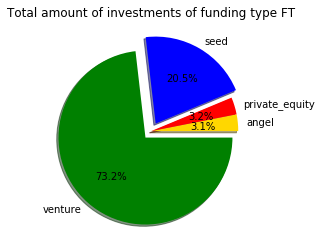

In [430]:
plot_data = master_frame_with_sector.raised_amount_usd.groupby(master_frame_with_sector.funding_round_type).sum()
explode = (0, 0, 0.1, 0.1)
colors = ['gold', 'red', 'blue', 'green']
plt.pie(plot_data, labels=plot_data.index, colors=colors, autopct='%.1f%%', shadow = True, explode=explode) 

# plt.pie(sums, labels=sums.index, colors=colors, shadow = True, explode = explode)
plt.title('Total amount of investments of funding type FT')
plt.show()

#### Boxplot chart to show average

Text(0, 0.5, 'Amounts %')

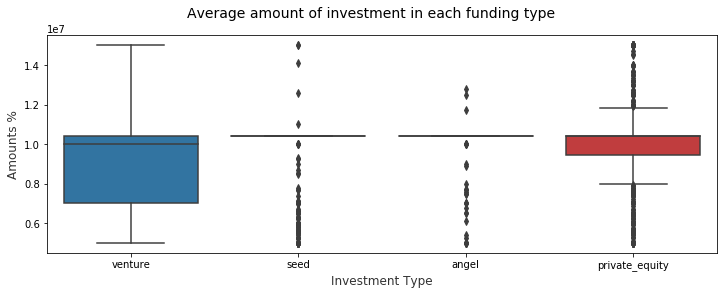

In [431]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Average amount of investment in each funding type', fontsize=14)
sns.boxplot(x="funding_round_type", y="raised_amount_usd", data=master_frame_with_sector,  ax=ax)
ax.set_xlabel("Investment Type",size = 12,alpha=0.8)
ax.set_ylabel("Amounts %",size = 12,alpha=0.8)

### 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [444]:
top9.head(9)

,country_code,total_amount
0,USA,2.653111e+11
1,GBR,1.611776e+10
2,IND,1.210973e+10
3,CAN,9.068564e+09
4,SGP,2.003944e+09
5,AUS,1.457922e+09
6,IRL,1.456945e+09
7,NZL,4.158138e+08
8,KEN,3.448111e+08


### Country1 - USA, Country 2 - GBR, Country 3 - IND updated in 'green', 'gold' and 'red' color

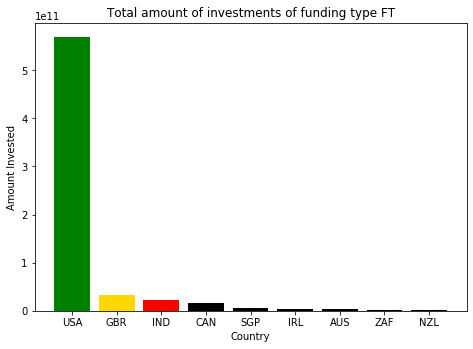

In [864]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(top9.country_code, top9.total_amount, color=['green', 'gold', 'red', 'black', 'black', 'black', 'black', 'black', 'black'])
plt.ylabel('Amount Invested')
plt.xlabel('Country')
plt.title('Total amount of investments of funding type FT')
plt.show()

Text(0.5, 1.0, 'Scatter plot on top9 country')

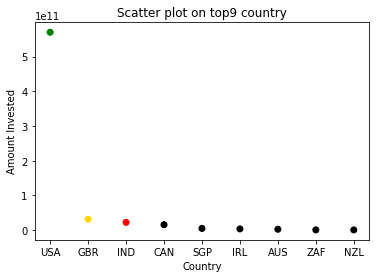

In [863]:
plt.scatter(top9.country_code,top9.total_amount,color=['green', 'gold', 'red', 'black', 'black', 'black', 'black', 'black', 'black'])
plt.ylabel('Amount Invested')
plt.xlabel('Country')
plt.title('Scatter plot on top9 country')

### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

#### As per the above questions concatenate three dataframe D1, D2, D3 

In [475]:
top_3_country = pd.concat([D1, D2, D3], ignore_index=True)
top_3_country=top_3_country.loc[top_3_country.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity']), ['country_code', 'main_sector', 'investment_count']].drop_duplicates().sort_values(by='investment_count', ascending=False)
top_3_country.head()

,country_code,main_sector,investment_count
390,USA,Others,4707
3089,USA,Cleantech / Semiconductors,3373
11,USA,"News, Search and Messaging",1201
6325,USA,Health,1182
8357,USA,"Social, Finance, Analytics, Advertising",891


Text(0.5, 1.0, 'Number of investments in the top 3 sectors of the top 3 countries')

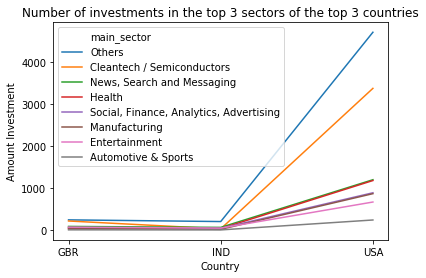

In [870]:
ax = sns.lineplot(x=top_3_country['country_code'], y=top_3_country['investment_count'], hue=top_3_country['main_sector'], data=top_3_country)
ax.set_ylabel('Amount Investment')
ax.set_xlabel('Country')
ax.set_title('Number of investments in the top 3 sectors of the top 3 countries')

Text(0.5, 1.0, 'Number of investments in the top 3 sectors of the top 3 countries')

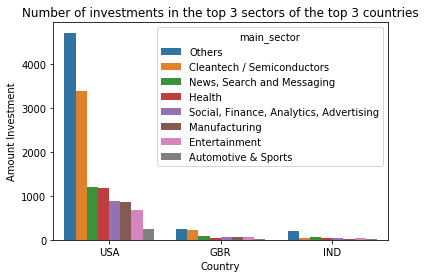

In [869]:
ax = sns.barplot(x=top_3_country['country_code'], y=top_3_country['investment_count'], hue=top_3_country['main_sector'], data=top_3_country)
ax.set_ylabel('Amount Investment')
ax.set_xlabel('Country')
ax.set_title('Number of investments in the top 3 sectors of the top 3 countries')